# Data Visualization of Spotify's Hip Hop Data



## Importing libraries



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor

## Loading Data

In [26]:
df1 = pd.read_csv("/content/hip_hop_data.csv")

In [28]:
df1.head()

,artist_name,track_name,genres,followers,popularity,duration,release_date,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,Drake,Rich Flex,"['canadian hip hop', 'canadian pop', 'hip hop'...",73637899,91,239.359,2022-11-04,0.561,0.520,0.2440,0.050300,0.000002,0.3550,0.424,153.150,hip hop
1,Drake,Jimmy Cooks (feat. 21 Savage),"['canadian hip hop', 'canadian pop', 'hip hop'...",73637899,88,218.364,2022-06-17,0.529,0.673,0.1750,0.000307,0.000002,0.0930,0.366,165.921,hip hop
2,Drake,One Dance,"['canadian hip hop', 'canadian pop', 'hip hop'...",73637899,86,173.986,2016-05-06,0.792,0.625,0.0536,0.007760,0.001800,0.3290,0.370,103.967,hip hop
3,Drake,WAIT FOR U (feat. Drake & Tems),"['canadian hip hop', 'canadian pop', 'hip hop'...",73637899,86,189.893,2022-04-29,0.463,0.642,0.3400,0.314000,0.000000,0.0686,0.339,83.389,hip hop
4,Drake,God's Plan,"['canadian hip hop', 'canadian pop', 'hip hop'...",73637899,85,198.973,2018-06-29,0.754,0.449,0.1090,0.033200,0.000083,0.5520,0.357,77.169,hip hop


In [29]:
df1.describe()

,followers,popularity,duration,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.234552e+07,74.438000,206.884796,0.723476,0.634764,0.174774,0.184937,0.015540,0.205668,0.464908,122.274612
std,1.414084e+07,7.016311,60.363625,0.139976,0.151252,0.122453,0.203310,0.090070,0.152277,0.223645,28.093029
min,1.402518e+06,37.000000,73.386000,0.216000,0.095800,0.025100,0.000015,0.000000,0.023500,0.035200,57.750000
25%,5.112480e+06,70.000000,166.539500,0.650500,0.537000,0.064900,0.033500,0.000000,0.105000,0.285500,97.099750
50%,8.747962e+06,75.000000,200.179500,0.741500,0.640500,0.144500,0.097850,0.000000,0.143000,0.459500,124.998500
75%,1.204705e+07,79.000000,237.759000,0.831000,0.741000,0.263250,0.269000,0.000027,0.274250,0.637500,141.988500
max,7.363790e+07,96.000000,588.139000,0.970000,0.956000,0.619000,0.948000,0.895000,0.873000,0.966000,207.982000


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       500 non-null    object 
 1   track_name        500 non-null    object 
 2   genres            500 non-null    object 
 3   followers         500 non-null    int64  
 4   popularity        500 non-null    int64  
 5   duration          500 non-null    float64
 6   release_date      500 non-null    object 
 7   danceability      500 non-null    float64
 8   energy            500 non-null    float64
 9   speechiness       500 non-null    float64
 10  acousticness      500 non-null    float64
 11  instrumentalness  500 non-null    float64
 12  liveness          500 non-null    float64
 13  valence           500 non-null    float64
 14  tempo             500 non-null    float64
 15  track_genre       500 non-null    object 
dtypes: float64(9), int64(2), object(5)
memory us

In [31]:
df_new = df1[["followers", "popularity", "duration", "danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]]

## Normalizing Data

In [22]:
from sklearn.preprocessing import StandardScaler

target = df_new.pop('popularity')

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
columns = ["followers", "duration", "danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
# Convert the normalized data back to a Pandas DataFrame
df_normalized = pd.DataFrame(df_scaled, columns=columns)

# Add the target column back to the normalized DataFrame
df_normalized['popularity'] = target

df_normalized.head()

,followers,duration,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,4.338764,0.538515,-1.161907,-0.759519,0.565890,-0.662888,-0.172688,0.981640,-0.183100,1.100142,91
1,4.338764,0.190358,-1.390747,0.253053,0.001844,-0.909030,-0.172682,-0.740630,-0.442698,1.555194,88
2,4.338764,-0.545556,0.490032,-0.064617,-0.990550,-0.872335,-0.152704,0.810728,-0.424795,-0.652331,86
3,4.338764,-0.281773,-1.862729,0.047891,1.350650,0.635446,-0.172708,-0.901025,-0.563546,-1.385559,86
4,4.338764,-0.131200,0.218285,-1.229405,-0.537678,-0.747081,-0.171787,2.276630,-0.482981,-1.607188,85


In [32]:
df2 = df_normalized.copy()

## Displaying columns with respect to time:

The graphs show trends of various factors with respect to time. This shows people's interests and changes in taste of type of music since 1995 to 2005.

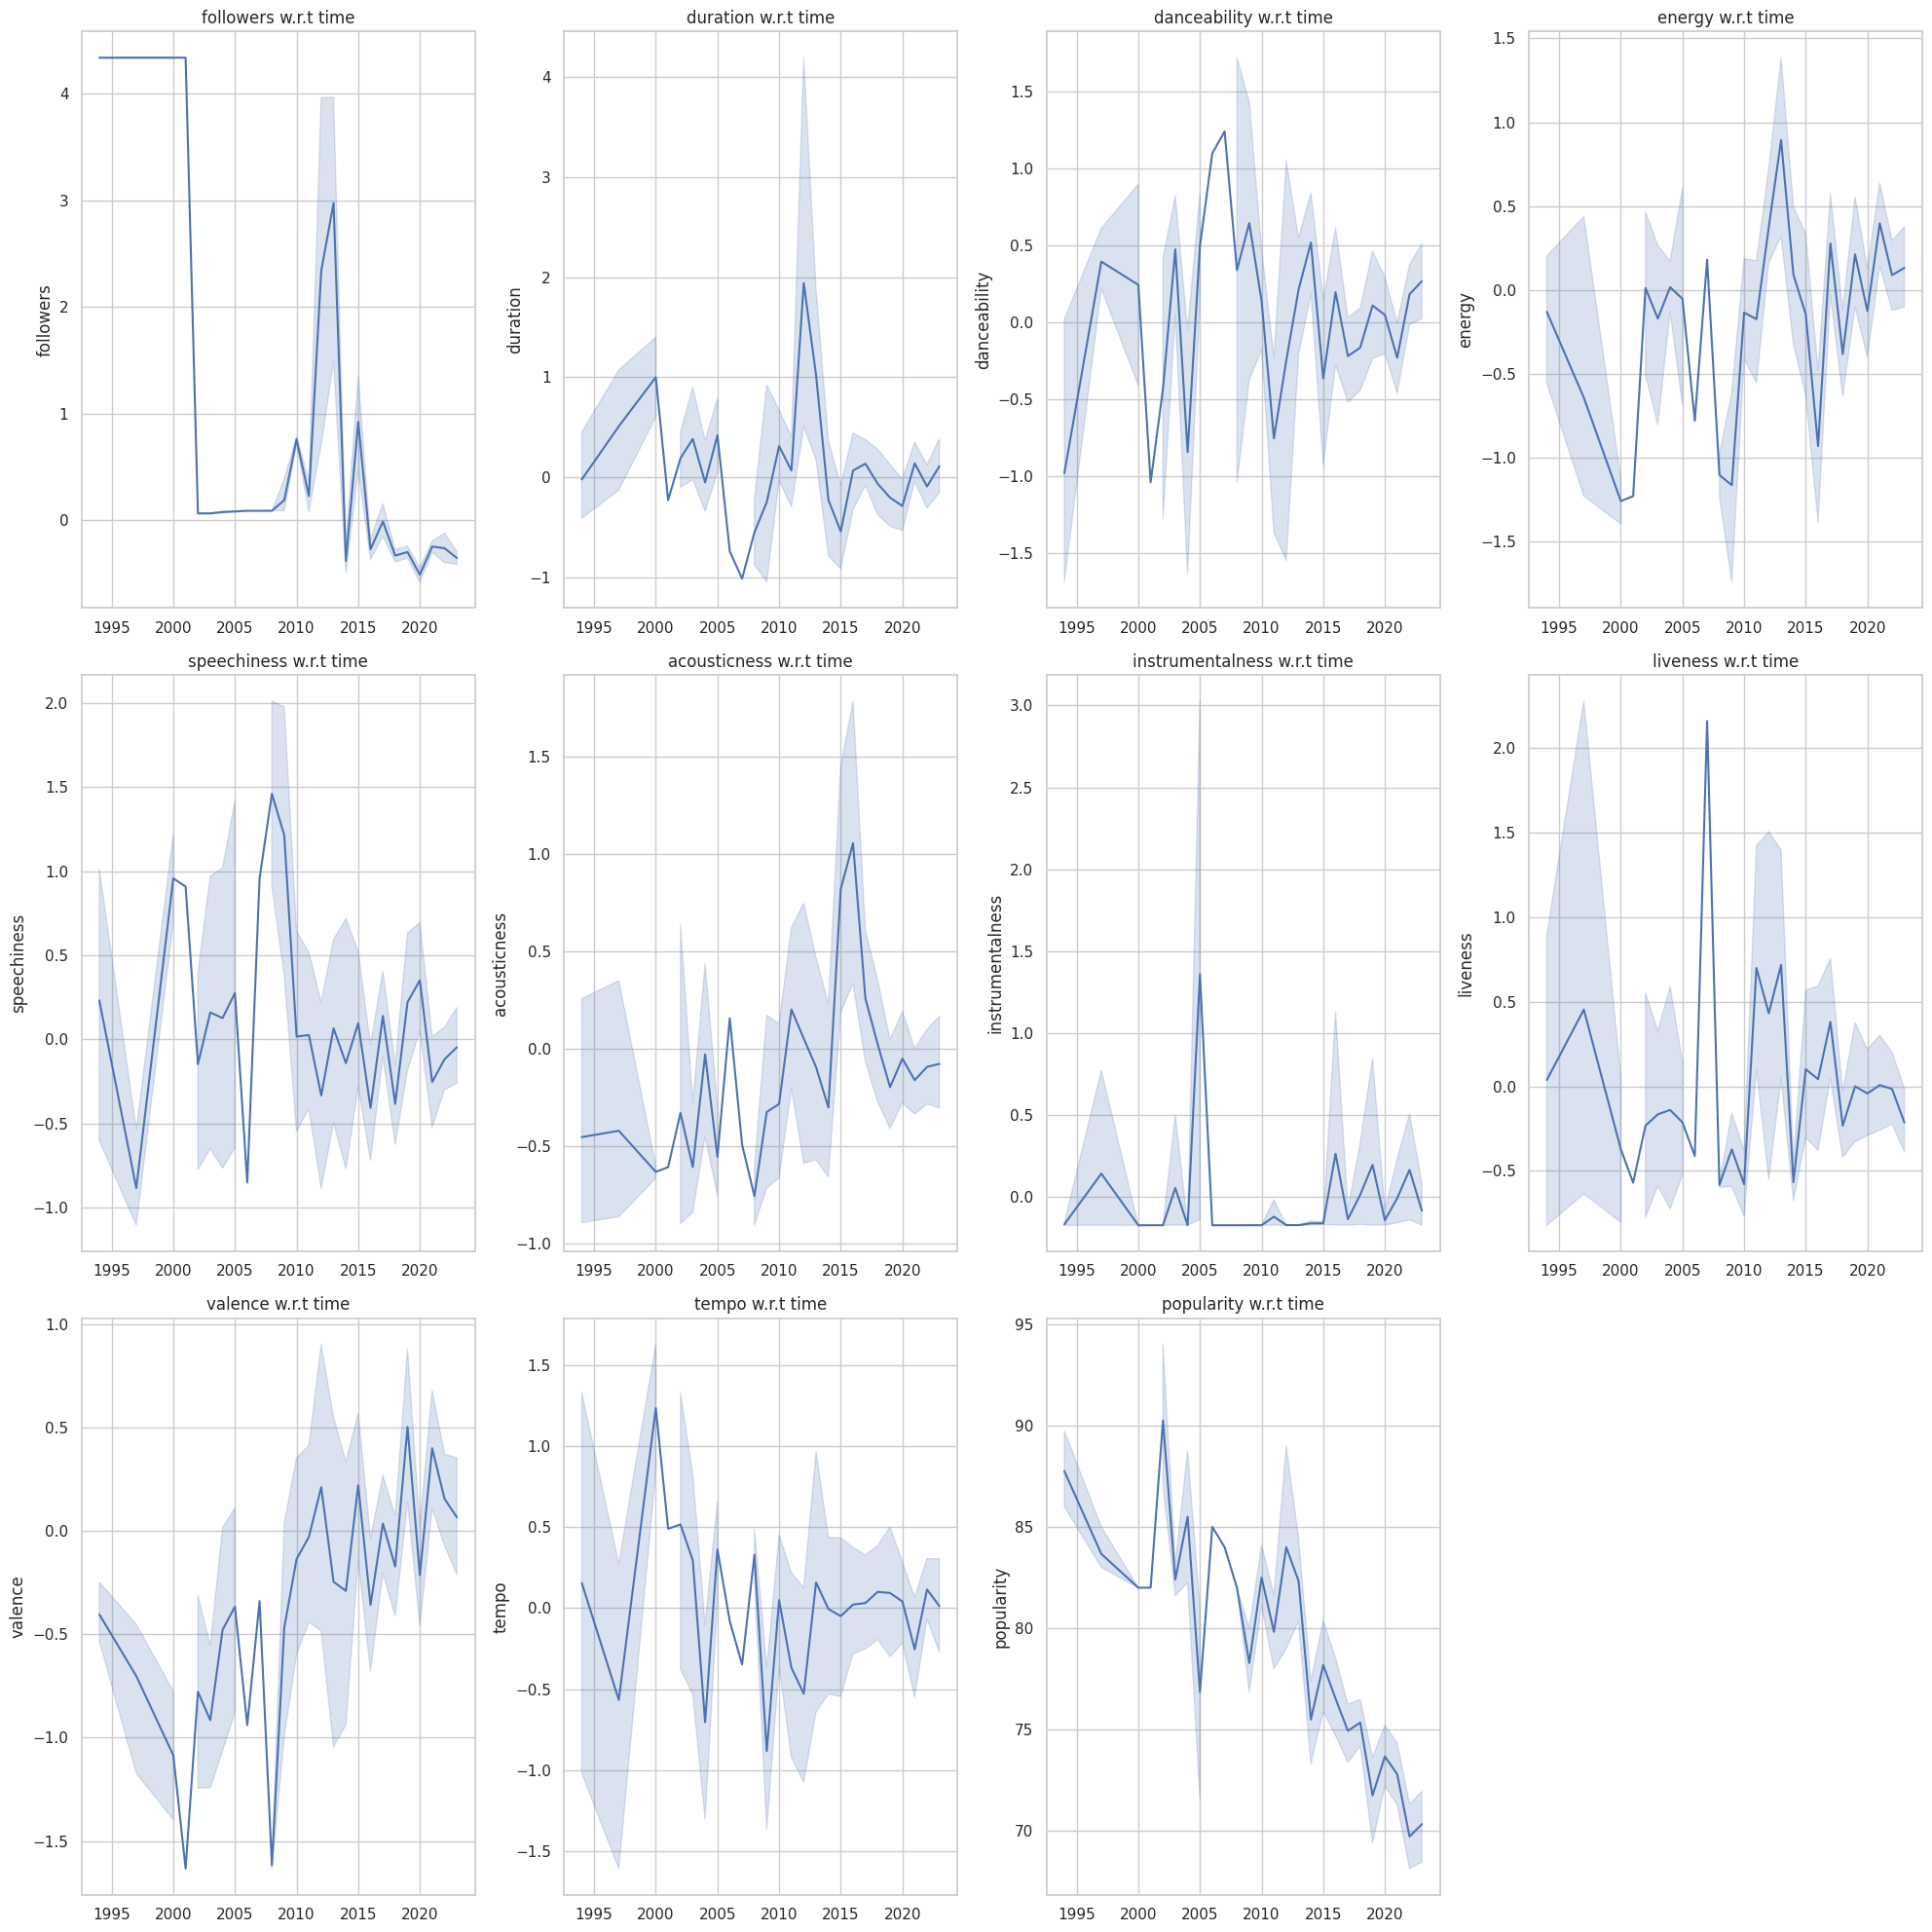

In [58]:
fig1, axs1 = plt.subplots(nrows=3, ncols=4, figsize=(20,20))
release_year1 = [int(i.split("-")[0]) for i in df1["release_date"]]
release_year1.sort()
for i, ax in enumerate(axs1.flat):
    if i >= len(df2.columns):
        fig1.delaxes(ax)
        break
    
    # Plot the data on the current axis
    sns.lineplot(x=release_year, y=df2[df2.columns[i]], ax=ax)
    ax.set_title(f"{df2.columns[i]} w.r.t time")

# Adjust the spacing between subplots
fig1.tight_layout()

# Display the plot
plt.show()


# Important charts


1.   The first chart shows the popularity distribution of songs.
2.   Second chart shows the relation of Popularity of a song with respect to the followers of the artist.
3.   The overall trend of hip hop music since 1995.



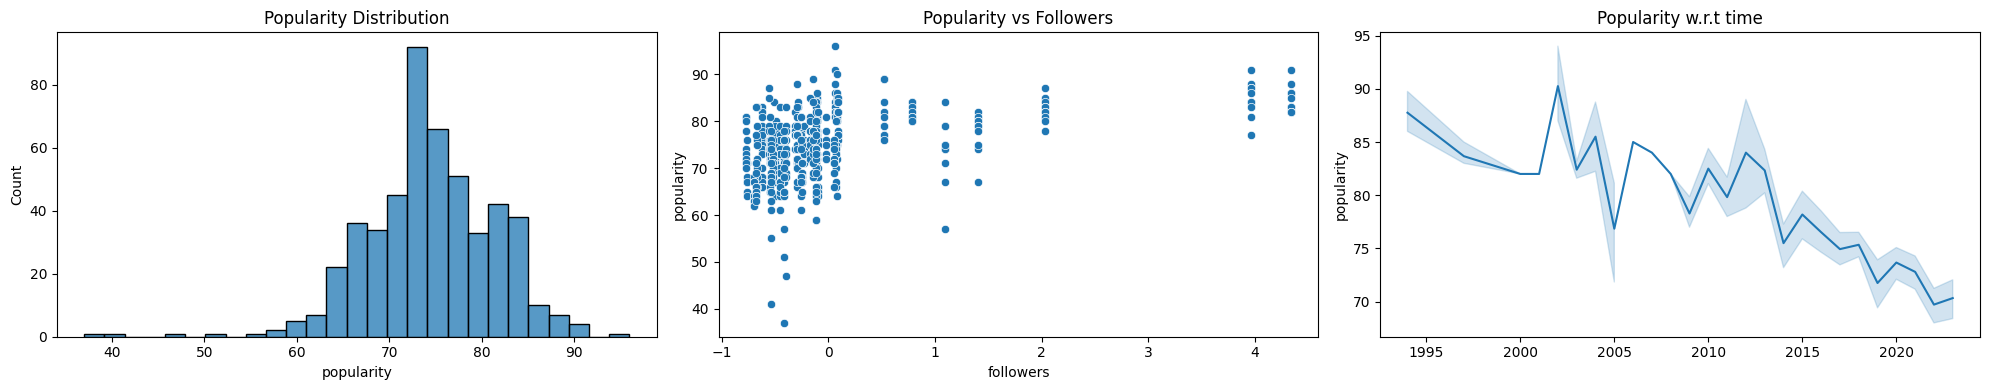

In [34]:
# Set up the subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,4))

# Distribution of popularity
sns.histplot(df2['popularity'], kde=False, ax=axs[0])
axs[0].set_title('Popularity Distribution')

# Scatter plot of popularity vs followers
sns.scatterplot(data=df2, x='followers', y='popularity', ax=axs[1])
axs[1].set_title('Popularity vs Followers')

release_year = [int(i.split("-")[0]) for i in df1["release_date"]]
release_year.sort()
# draw lineplot
sns.lineplot(x=release_year, y=df2["popularity"], ax=axs[2])
axs[2].set_title("Popularity w.r.t time")

# Adjust the layout and save the figure
fig.tight_layout()
plt.show()

## Correlation matrix
The matrix shows that the number of followers of an artist is the key factor in the popularity of a song.

Text(0.5, 1.0, 'Correlation Heatmap')

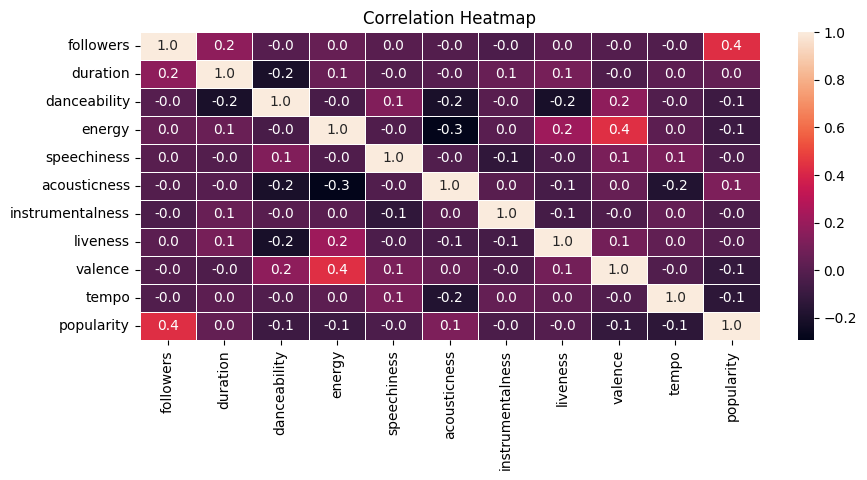

In [35]:
#correlation map
f,ax = plt.subplots(figsize=(10,4))
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
# Correlation heatmap
plt.title('Correlation Heatmap')

## Feature charts
The charts show trends of all features with each other.

<Figure size 1600x800 with 0 Axes>

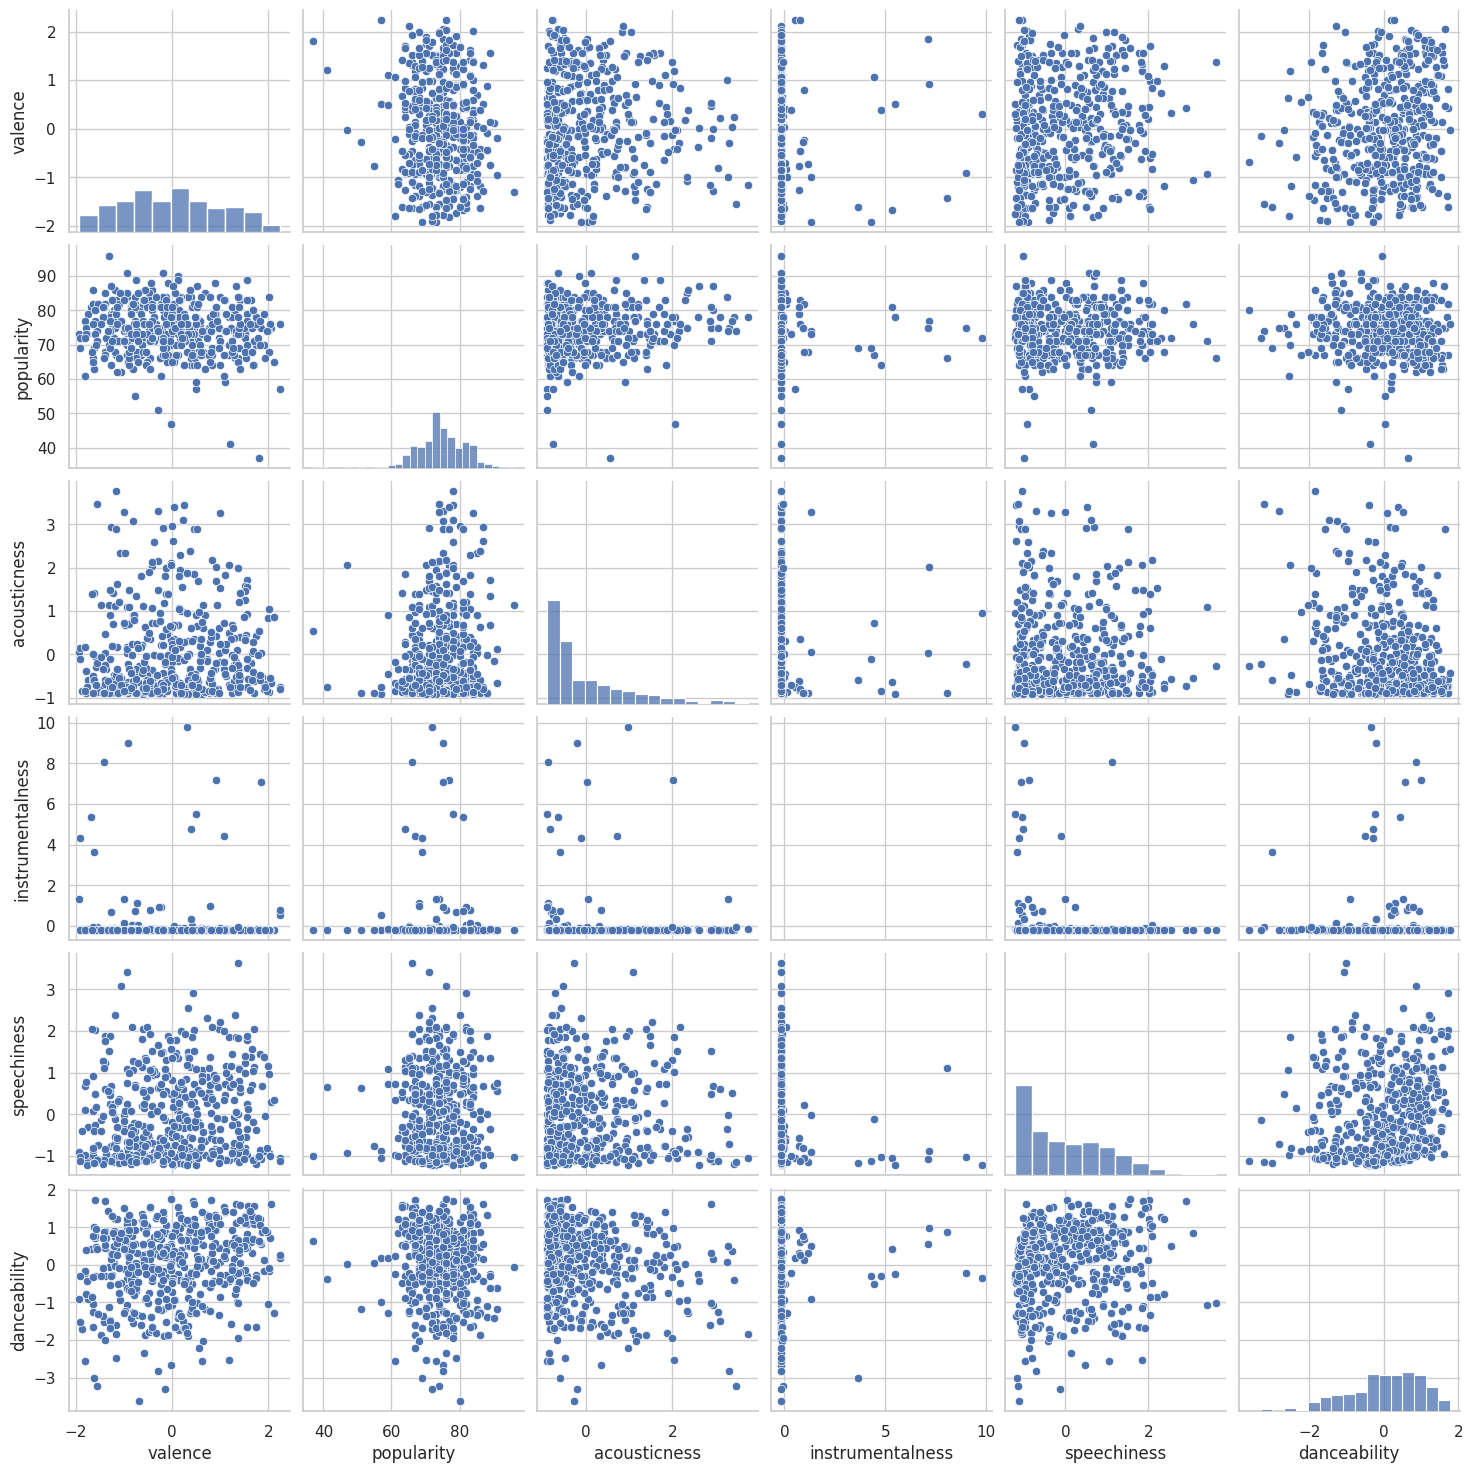

In [36]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["valence","popularity","acousticness","instrumentalness","speechiness","danceability" ]
sns.pairplot(df[cols], height = 2.5 )
plt.show()

## Extra trees regressor
The extra trees regressor model is used to visualize the impact of various features on the popularity of a song.

In [45]:
def extra_trees_regressor(df, X, y):
      model = ExtraTreesRegressor()
      model.fit(X, y)
      # plot graph of feature importances for better visualization
      return model

In [41]:
X = df_normalized[['followers', 'duration', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df_normalized['popularity']

In [46]:
model = extra_trees_regressor(df_normalized, X, y)

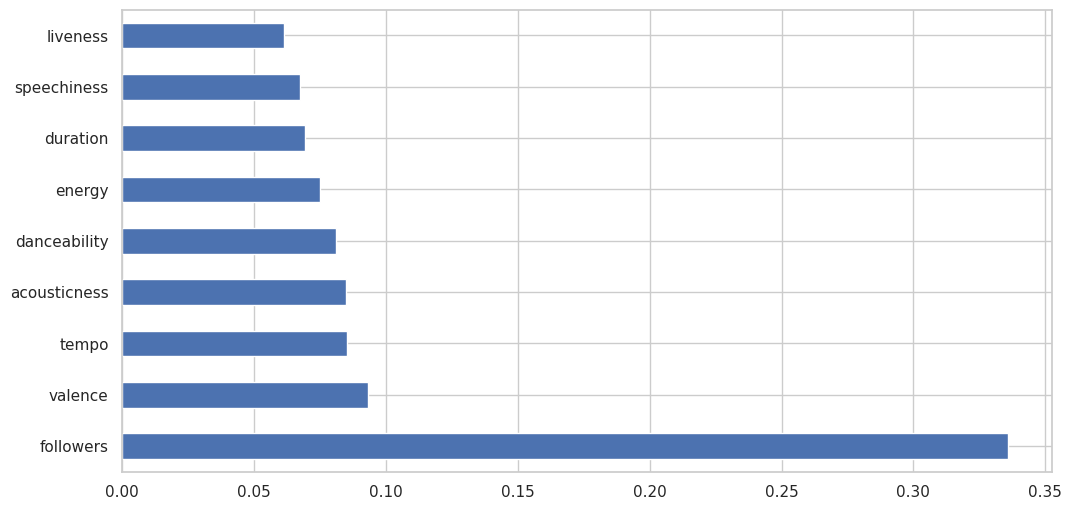

In [47]:
plt.figure(figsize=[12, 6])
feat_importances = pd.Series(model.feature_importances_, index=df[
    ['followers', 'duration', 'danceability', 'energy', 'speechiness',
  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()